# DATA COLLECTION

In [1]:
!pip install --upgrade pip

In [2]:
#!pip3 install twint, textblob, wordcloud
!pip install -U textblob
!pip install emoji --upgrade
!pip install --upgrade pip
!pip install wordcloud
!pip install nest_asyncio
import os
!pip install twint
!pip uninstall twint -y
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint/
!pip3 install . -r requirements.txt
%cd ..


Found existing installation: twint 2.1.21
Uninstalling twint-2.1.21:
  Successfully uninstalled twint-2.1.21
fatal: destination path 'twint' already exists and is not an empty directory.
/Users/Maryam/Desktop/Python/twint
Processing /Users/Maryam/Desktop/Python/twint
  Preparing metadata (setup.py) ... done


  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38861 sha256=ac44bfc1b021b351f2c4080190c6120d1786eb1f406a43f1dab8c253739a7f49
  Stored in directory: /private/var/folders/b8/hhvzynw93bx2wt1qhyy9dy300000gn/T/pip-ephem-wheel-cache-238g043z/wheels/2b/05/40/fa20ecedb09144afc4c4398c90abda76a2ae4d4e6409e60e43
Successfully built twint
/Users/Maryam/Desktop/Python


In [3]:
conda install -c conda-forge/label/gcc7 missingno 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
#scientific and machine learning libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#plotting options
import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms
#% matplotlib inline
pd.set_option('display.max_colwidth',None)
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#twint
import twint
#to avoid problems with running twint
import nest_asyncio
nest_asyncio.apply()


In [5]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
!pip install spacy
import spacy

# importing package to recognize stop words i.e. the, and, an etc
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = spacy.lang.en.stop_words.STOP_WORDS

import datetime

import plotly.express as px

#nltk.download('punkt')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

stemmer = PorterStemmer()

In [6]:
keywords = [
           {'telehealth'},
           {'telemedicine'},
           {'#covid19'}]

search_concatenation = keywords

In [7]:
search_concatenation

[{'telehealth'}, {'telemedicine'}, {'#covid19'}]

In [8]:
len(search_concatenation)

3

In [9]:
# the concept is to perform the scraping using the elements in the lists above: imm_basic, immigrant_mod, migrant_mod and refugee_mod
df = []
for s in search_concatenation:
    import twint
    config = twint.Config()
    import nest_asyncio
    nest_asyncio.apply()
    config.Search = s
    config.Lang = "en"
    config.Limit = 1000
    config.Since = "2020-01-01"
    config.Until = "2021-10-31"
    config.Hide_output = True
    config.Pandas = True
    twint.run.Search(config)
    Tweets_df = twint.storage.panda.Tweets_df
    df.append(Tweets_df)  
    
# see pd.concat documentation for more info
df = pd.concat(df).sort_values(by=['date']).reset_index()


print(len(df))

3010


In [10]:
df.shape

(3010, 39)

In [11]:
# with this command I'm checking 

df.groupby('search').sum().shape, len(search_concatenation)

((3, 9), 3)

In [12]:
##Save Uncleaned Data
df.to_csv('uncleaned_data_211106.csv')

In [13]:
#Upload Data
df = pd.read_csv("uncleaned_data_211106.csv")


# DATA CLEANING

In [14]:
df.head()

,Unnamed: 0,index,id,conversation_id,created_at,date,timezone,place,tweet,language,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,999,1453229587522019334,1453229587522019334,1.635312e+12,2021-10-27 01:18:28,-400,NaN,The Emergence &amp; Implications of Telemedicine &amp; Telehealth for the US Healthcare System https://www.newsbreak.com/news/2292587483949/the-emergence-implications-of-telemedicine-telehealth-for-the-us-healthcare-system,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,998,1453230771838361609,1453230771838361609,1.635312e+12,2021-10-27 01:23:10,-400,NaN,There's still time to register for tomorrow's webinar on Digital Transformation in Healthcare. Find out more and register here - https://t.co/nOVHKHWR02 #digitalhealth #healthcare #telehealth #telemedicine https://t.co/bpPOUNEtym,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,997,1453232218768302087,1453094329011130368,1.635313e+12,2021-10-27 01:28:55,-400,NaN,"@KaitlynnCounts I saw mine once, via telemedicine, and since then we just text.",en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'KaitlynnCounts', 'name': 'Kaitlynn Hope Counts', 'id': '1394713008102944771'}]",NaN,NaN,NaN,NaN
3,3,996,1453232489284182022,1453059440840744961,1.635313e+12,2021-10-27 01:29:59,-400,NaN,"@abdavidson @POTUS @NTIAgov @JRosenworcel @gigibsohn Such important work all three of you have ahead, especially as more of our country relies upon healthcare (including telemedicine) and other services that require connectivity to deliver. Last mile problem still exists across much of the US.",en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'abdavidson', 'name': 'Alan Davidson', 'id': '16133829'}, {'screen_name': 'POTUS', 'name': 'President Biden', 'id': '1349149096909668363'}, {'screen_name': 'NTIAgov', 'name': 'NTIA', 'id': '97465432'}, {'screen_name': 'JRosenworcel', 'name': 'Jessica Rosenworcel', 'id': '716564185'}, {'screen_name': 'gigibsohn', 'name': 'Gigi Sohn', 'id': '18730427'}]",NaN,NaN,NaN,NaN
4,4,995,1453234879165050880,1453234879165050880,1.635313e+12,2021-10-27 01:39:29,-400,NaN,"Here's what @JohnNosta has to say about #Technology in #Healthcare, Educating people, including healthcare providers, and building awareness remains the top priority in #DigitalTransformation https://t.co/zmKXs9VY8S via @Cheddar #AiHealthcare #XR #Robotics #telemedicine #Ai #5G",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3010 non-null   int64  
 1   index            3010 non-null   int64  
 2   id               3010 non-null   int64  
 3   conversation_id  3010 non-null   int64  
 4   created_at       3010 non-null   float64
 5   date             3010 non-null   object 
 6   timezone         3010 non-null   int64  
 7   place            6 non-null      object 
 8   tweet            3010 non-null   object 
 9   language         3010 non-null   object 
 10  hashtags         3010 non-null   object 
 11  cashtags         3010 non-null   object 
 12  user_id          3010 non-null   int64  
 13  user_id_str      3010 non-null   int64  
 14  username         3010 non-null   object 
 15  name             3010 non-null   object 
 16  day              3010 non-null   int64  
 17  hour          

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3010 non-null   int64  
 1   index            3010 non-null   int64  
 2   id               3010 non-null   int64  
 3   conversation_id  3010 non-null   int64  
 4   created_at       3010 non-null   float64
 5   date             3010 non-null   object 
 6   timezone         3010 non-null   int64  
 7   place            6 non-null      object 
 8   tweet            3010 non-null   object 
 9   language         3010 non-null   object 
 10  hashtags         3010 non-null   object 
 11  cashtags         3010 non-null   object 
 12  user_id          3010 non-null   int64  
 13  user_id_str      3010 non-null   int64  
 14  username         3010 non-null   object 
 15  name             3010 non-null   object 
 16  day              3010 non-null   int64  
 17  hour          

In [17]:
df['tweet'].nunique()

2873

In [18]:
df['INCDTTM'] =  pd.to_datetime(df['date'], infer_datetime_format=True)
df['Time'] = [datetime.datetime.time(d) for d in df['INCDTTM']] 
df['date'] = [datetime.datetime.date(d) for d in df['INCDTTM']]
df['Year'] = [datetime.datetime.date(d).year for d in df['INCDTTM']] 
df['Month'] = [datetime.datetime.date(d).month for d in df['INCDTTM']] 
df = df.drop(columns = ['date','INCDTTM'])
df.head()

,Unnamed: 0,index,id,conversation_id,created_at,timezone,place,tweet,language,hashtags,...,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Time,Year,Month
0,0,999,1453229587522019334,1453229587522019334,1.635312e+12,-400,NaN,The Emergence &amp; Implications of Telemedicine &amp; Telehealth for the US Healthcare System https://www.newsbreak.com/news/2292587483949/the-emergence-implications-of-telemedicine-telehealth-for-the-us-healthcare-system,en,[],...,NaN,NaN,[],NaN,NaN,NaN,NaN,01:18:28,2021,10
1,1,998,1453230771838361609,1453230771838361609,1.635312e+12,-400,NaN,There's still time to register for tomorrow's webinar on Digital Transformation in Healthcare. Find out more and register here - https://t.co/nOVHKHWR02 #digitalhealth #healthcare #telehealth #telemedicine https://t.co/bpPOUNEtym,en,"['digitalhealth', 'healthcare', 'telehealth', 'telemedicine']",...,NaN,NaN,[],NaN,NaN,NaN,NaN,01:23:10,2021,10
2,2,997,1453232218768302087,1453094329011130368,1.635313e+12,-400,NaN,"@KaitlynnCounts I saw mine once, via telemedicine, and since then we just text.",en,[],...,NaN,NaN,"[{'screen_name': 'KaitlynnCounts', 'name': 'Kaitlynn Hope Counts', 'id': '1394713008102944771'}]",NaN,NaN,NaN,NaN,01:28:55,2021,10
3,3,996,1453232489284182022,1453059440840744961,1.635313e+12,-400,NaN,"@abdavidson @POTUS @NTIAgov @JRosenworcel @gigibsohn Such important work all three of you have ahead, especially as more of our country relies upon healthcare (including telemedicine) and other services that require connectivity to deliver. Last mile problem still exists across much of the US.",en,[],...,NaN,NaN,"[{'screen_name': 'abdavidson', 'name': 'Alan Davidson', 'id': '16133829'}, {'screen_name': 'POTUS', 'name': 'President Biden', 'id': '1349149096909668363'}, {'screen_name': 'NTIAgov', 'name': 'NTIA', 'id': '97465432'}, {'screen_name': 'JRosenworcel', 'name': 'Jessica Rosenworcel', 'id': '716564185'}, {'screen_name': 'gigibsohn', 'name': 'Gigi Sohn', 'id': '18730427'}]",NaN,NaN,NaN,NaN,01:29:59,2021,10
4,4,995,1453234879165050880,1453234879165050880,1.635313e+12,-400,NaN,"Here's what @JohnNosta has to say about #Technology in #Healthcare, Educating people, including healthcare providers, and building awareness remains the top priority in #DigitalTransformation https://t.co/zmKXs9VY8S via @Cheddar #AiHealthcare #XR #Robotics #telemedicine #Ai #5G",en,"['technology', 'healthcare', 'digitaltransformation', 'aihealthcare', 'xr', 'robotics', 'telemedicine', 'ai', '5g']",...,NaN,NaN,[],NaN,NaN,NaN,NaN,01:39:29,2021,10


In [19]:
df.columns

Index(['Unnamed: 0', 'index', 'id', 'conversation_id', 'created_at',
       'timezone', 'place', 'tweet', 'language', 'hashtags', 'cashtags',
       'user_id', 'user_id_str', 'username', 'name', 'day', 'hour', 'link',
       'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest', 'Time', 'Year', 'Month'],
      dtype='object')

In [20]:
df=df.drop(['index', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest',], axis=1)

In [21]:
#filter out non-english tweets from dataset
df=df[df['language'] == 'en']

In [22]:
df.head()

,Unnamed: 0,tweet,language,day,geo,Time,Year,Month
0,0,The Emergence &amp; Implications of Telemedicine &amp; Telehealth for the US Healthcare System https://www.newsbreak.com/news/2292587483949/the-emergence-implications-of-telemedicine-telehealth-for-the-us-healthcare-system,en,3,NaN,01:18:28,2021,10
1,1,There's still time to register for tomorrow's webinar on Digital Transformation in Healthcare. Find out more and register here - https://t.co/nOVHKHWR02 #digitalhealth #healthcare #telehealth #telemedicine https://t.co/bpPOUNEtym,en,3,NaN,01:23:10,2021,10
2,2,"@KaitlynnCounts I saw mine once, via telemedicine, and since then we just text.",en,3,NaN,01:28:55,2021,10
3,3,"@abdavidson @POTUS @NTIAgov @JRosenworcel @gigibsohn Such important work all three of you have ahead, especially as more of our country relies upon healthcare (including telemedicine) and other services that require connectivity to deliver. Last mile problem still exists across much of the US.",en,3,NaN,01:29:59,2021,10
4,4,"Here's what @JohnNosta has to say about #Technology in #Healthcare, Educating people, including healthcare providers, and building awareness remains the top priority in #DigitalTransformation https://t.co/zmKXs9VY8S via @Cheddar #AiHealthcare #XR #Robotics #telemedicine #Ai #5G",en,3,NaN,01:39:29,2021,10


In [23]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Maryam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
import re 
from textblob import TextBlob 
import emoji  


import re 
from textblob import TextBlob 
import emoji  

def clean_tweet(text): 
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'twitter+', '',  str(text)) # remove the twiiter
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic
    text = re.sub(r'virtual care', '',  str(text)) # remove the text
    text = re.sub(r'covid19', '',  str(text)) # remove the pic
    text = re.sub(r'coronavirus', '',  str(text)) # remove the pic
    text = re.sub(r'telehealth', '',  str(text)) # remove the pic
    text = re.sub(r'virtual', '',  str(text)) # remove the pic
    text = re.sub(r'care', '',  str(text)) # remove the pic
    text = re.sub(r'covid-19', '',  str(text)) # remove the pic
    text = re.sub(r'corona', '',  str(text)) # remove the pic
    text = re.sub(r'covid', '',  str(text)) # remove the pic
    text = re.sub(r'telemedicine', '',  str(text)) # remove the pic


    
    return text


def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)



In [26]:
#### Now creating some functions to do text processing
# Removing hashtags and mentions
def get_hashtags(text):
    hashtags = re.findall(r'\#\w+',text.lower())
    return hashtags
def get_mentions(text):
    mentions = re.findall(r'\@\w+',text.lower())
    return mentions

# Cleaning up the text of the tweets
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text

def process_tweet(tweet):
    """ 
    tweets cleaning by 
    1) lowering the case of the tweet, 
    2) removing unwanted symbols and replacing them with a whitespace, 
    3) split sentences into words according to whitespaces and then 
    4) join back with a single whitespace as separator between various words
    """
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

def process_text(text, stem=False): #clean text
    text=remove_content(text)
    lemmatizer=WordNetLemmatizer()
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'twitter+', '',  str(text)) # remove the twiiter
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic
    text = re.sub(r"\bamp\b", ' ', text.lower()) #remove "amp" which is coming from the translation of &
    text = re.sub(r"\bco\b", ' ', text.lower()) #remove "co" which was one of the top words found below
    tokenized_text = word_tokenize(text) #tokenize
    #tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
    clean_text = [
         word for word in tokenized_text
         if (word not in stop_words and len(word)>1)
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    clean_text = [lemmatizer.lemmatize(word) for word in clean_text]
    return ' '.join(clean_text)

#functions used to remove search terms from all the tweets
#function to remove duplicates from a string - in this case the string is the keywords used to scrape the tweets
def removeDupWithoutOrder(string): 
    words = string.lower().split()
    return " ".join(sorted(set(words), key=words.index)).replace('OR', '').replace('  ', ' ')

#function to search for string (i.e. tweet in this case) and remove specific words (search_terms in this case)
def remove_search(text, search_terms):
    query = text.lower()
    querywords = query.split()
    resultwords  = [word for word in querywords if word.lower() not in search_terms]
    return ' '.join(resultwords)

# define function to plot frequency of bi-grams, tri-grams, single words, phrases etc
from sklearn.feature_extraction.text import CountVectorizer
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')
    pl.show('png')

In [27]:
#df['cleaned_tweets']=df['tweet'].apply(clean_tweet)

# removing useless content (hashtags, mentions)
df['tweet']=df['tweet'].apply(lambda x: remove_content(x))

In [28]:
#df['cleaned_tweets']=df['cleaned_tweets'].apply(remove_emoji)

# Several functions applied here: processing the *tweet* to remove punctuation, hashtags, mentions
# then removing the search terms used to do the tweets scraping and re-process the *text* 

df['cleaned_tweets']=df['tweet'].apply(lambda x: process_tweet(x))

In [29]:
# Remove stop words
#df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

#this next row drops from the scraped tweets the same keywords that were used to perform the search.
#if these words are excluded, the sentiment analysis performed with text blob looks at the whole tweet 
#and can spit out a different sentiment wrt if leaving the search terms in. Perhaps worth test it out a bit
#and look at TextBlob with naivebayes too.

df['cleaned_tweets']=df['cleaned_tweets'].apply(lambda x: remove_search(x, search_concatenation))

#df['cleaned_tweets']=df['cleaned_tweets'].apply(lambda x: process_text(x))

In [30]:
df.head()

,Unnamed: 0,tweet,language,day,geo,Time,Year,Month,cleaned_tweets
0,0,The Emergence &amp; Implications of Telemedicine &amp; Telehealth for the US Healthcare System,en,3,NaN,01:18:28,2021,10,the emergence amp implications of telemedicine amp telehealth for the us healthcare system
1,1,There's still time to register for tomorrow's webinar on Digital Transformation in Healthcare. Find out more and register here -,en,3,NaN,01:23:10,2021,10,there s still time to register for tomorrow s webinar on digital transformation in healthcare find out more and register here
2,2,"I saw mine once, via telemedicine, and since then we just text.",en,3,NaN,01:28:55,2021,10,i saw mine once via telemedicine and since then we just text
3,3,"Such important work all three of you have ahead, especially as more of our country relies upon healthcare (including telemedicine) and other services that require connectivity to deliver. Last mile problem still exists across much of the US.",en,3,NaN,01:29:59,2021,10,such important work all three of you have ahead especially as more of our country relies upon healthcare including telemedicine and other services that require connectivity to deliver last mile problem still exists across much of the us
4,4,"Here's what has to say about in , Educating people, including healthcare providers, and building awareness remains the top priority in via",en,3,NaN,01:39:29,2021,10,here s what has to say about in educating people including healthcare providers and building awareness remains the top priority in via


In [31]:
df.tail()

,Unnamed: 0,tweet,language,day,geo,Time,Year,Month,cleaned_tweets
2997,2997,""" even before Emergency Room overcrowding had been a widespread problem and a source of patient harm - reflective of health system dysfunction throughout the United States,"" NEJM",en,5,NaN,19:59:19,2021,10,even before emergency room overcrowding had been a widespread problem and a source of patient harm reflective of health system dysfunction throughout the united states nejm
3002,3002,"Johns Hopkins University of Medicine: As of 06:22 Thailand time (GMT+7) on 30 October 2021 there were 245,971,213 confirmed cases globally (+502,136 since 06:22 Thailand time on 29 October) and 4,988,370 deaths (+8,614).",en,5,NaN,19:59:44,2021,10,johns hopkins university of medicine as of 06 22 thailand time gmt 7 on 30 october 2021 there were 245 971 213 confirmed cases globally 502 136 since 06 22 thailand time on 29 october and 4 988 370 deaths 8 614
3004,3004,"reported zero new cases of to 8pm last night. Recovered cases 300. Active cases 17 (13 in Wentworth LGA, 2 in and 2 in",en,5,NaN,19:59:46,2021,10,reported zero new cases of to 8pm last night recovered cases 300 active cases 17 13 in wentworth lga 2 in and 2 in
3006,3006,"One Islamic Republic official confirms the sixth wave of has begun in Iran, while the other talks about reopening the schools &amp; country while less than 40% are vaccinated! Civil Reg Org data shows 301,000+ have died... Graphs &amp; more…",en,5,NaN,19:59:54,2021,10,one islamic republic official confirms the sixth wave of has begun in iran while the other talks about reopening the schools amp country while less than 40 are vaccinated civil reg org data shows 301 000 have died graphs amp more
3008,3008,I wonder what and all the other terrorists have to say about this?,en,5,NaN,19:59:57,2021,10,i wonder what and all the other terrorists have to say about this


In [32]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

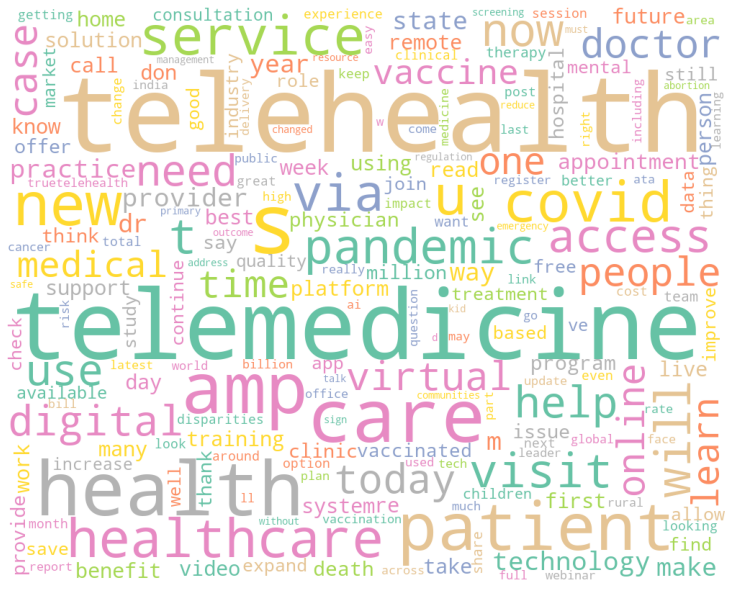

In [33]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.cleaned_tweets: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Data Analysis

In [34]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [35]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [36]:
df.dropna(subset=['cleaned_tweets'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [37]:
df['Subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['Polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

,Unnamed: 0,tweet,language,day,geo,Time,Year,Month,cleaned_tweets,Subjectivity,Polarity
0,0,The Emergence &amp; Implications of Telemedicine &amp; Telehealth for the US Healthcare System,en,3,NaN,01:18:28,2021,10,the emergence amp implications of telemedicine amp telehealth for the us healthcare system,0.000000,0.000000
1,1,There's still time to register for tomorrow's webinar on Digital Transformation in Healthcare. Find out more and register here -,en,3,NaN,01:23:10,2021,10,there s still time to register for tomorrow s webinar on digital transformation in healthcare find out more and register here,0.250000,0.250000
2,2,"I saw mine once, via telemedicine, and since then we just text.",en,3,NaN,01:28:55,2021,10,i saw mine once via telemedicine and since then we just text,0.000000,0.000000
3,3,"Such important work all three of you have ahead, especially as more of our country relies upon healthcare (including telemedicine) and other services that require connectivity to deliver. Last mile problem still exists across much of the US.",en,3,NaN,01:29:59,2021,10,such important work all three of you have ahead especially as more of our country relies upon healthcare including telemedicine and other services that require connectivity to deliver last mile problem still exists across much of the us,0.523611,0.245833
4,4,"Here's what has to say about in , Educating people, including healthcare providers, and building awareness remains the top priority in via",en,3,NaN,01:39:29,2021,10,here s what has to say about in educating people including healthcare providers and building awareness remains the top priority in via,0.500000,0.500000


In [38]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
df.head()



,Unnamed: 0,tweet,language,day,geo,Time,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,The Emergence &amp; Implications of Telemedicine &amp; Telehealth for the US Healthcare System,en,3,NaN,01:18:28,2021,10,the emergence amp implications of telemedicine amp telehealth for the us healthcare system,0.000000,0.000000,Neutral,Fact
1,1,There's still time to register for tomorrow's webinar on Digital Transformation in Healthcare. Find out more and register here -,en,3,NaN,01:23:10,2021,10,there s still time to register for tomorrow s webinar on digital transformation in healthcare find out more and register here,0.250000,0.250000,Positive,Opinion
2,2,"I saw mine once, via telemedicine, and since then we just text.",en,3,NaN,01:28:55,2021,10,i saw mine once via telemedicine and since then we just text,0.000000,0.000000,Neutral,Fact
3,3,"Such important work all three of you have ahead, especially as more of our country relies upon healthcare (including telemedicine) and other services that require connectivity to deliver. Last mile problem still exists across much of the US.",en,3,NaN,01:29:59,2021,10,such important work all three of you have ahead especially as more of our country relies upon healthcare including telemedicine and other services that require connectivity to deliver last mile problem still exists across much of the us,0.523611,0.245833,Positive,Opinion
4,4,"Here's what has to say about in , Educating people, including healthcare providers, and building awareness remains the top priority in via",en,3,NaN,01:39:29,2021,10,here s what has to say about in educating people including healthcare providers and building awareness remains the top priority in via,0.500000,0.500000,Positive,Opinion


In [39]:
df.to_csv("PolaritySubjectivity_211106.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2390 non-null   int64  
 1   tweet                  2390 non-null   object 
 2   language               2390 non-null   object 
 3   day                    2390 non-null   int64  
 4   geo                    0 non-null      float64
 5   Time                   2390 non-null   object 
 6   Year                   2390 non-null   int64  
 7   Month                  2390 non-null   int64  
 8   cleaned_tweets         2390 non-null   object 
 9   Subjectivity           2390 non-null   float64
 10  Polarity               2390 non-null   float64
 11  Analysis_Polarity      2390 non-null   object 
 12  Analysis_Subjectivity  2390 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 242.9+ KB


# SENTIMENT ANALYSIS

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

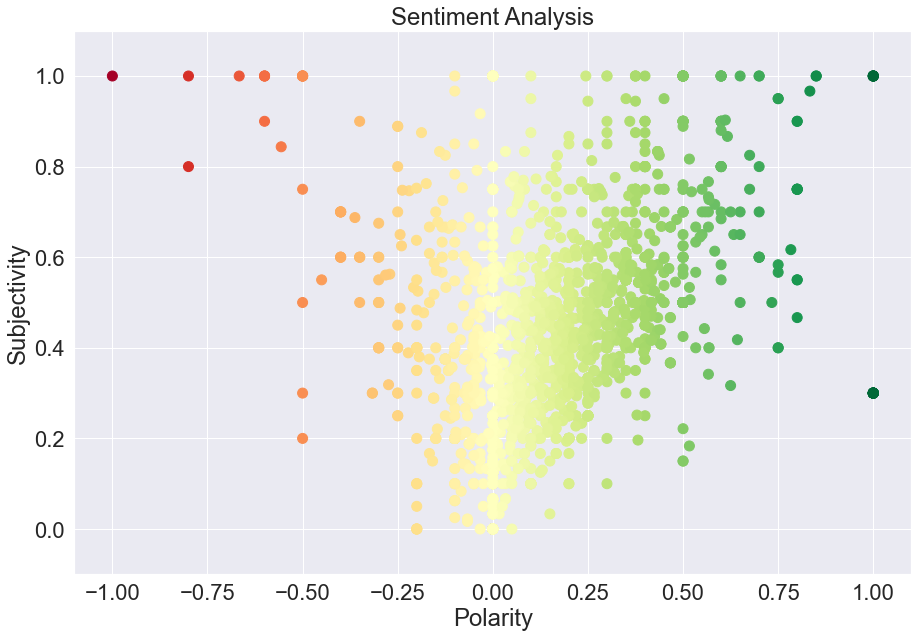

(None,)

In [42]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

In [43]:
# Show the value counts
df['Analysis_Polarity'].value_counts()

Positive    1297
Neutral      790
Negative     303
Name: Analysis_Polarity, dtype: int64

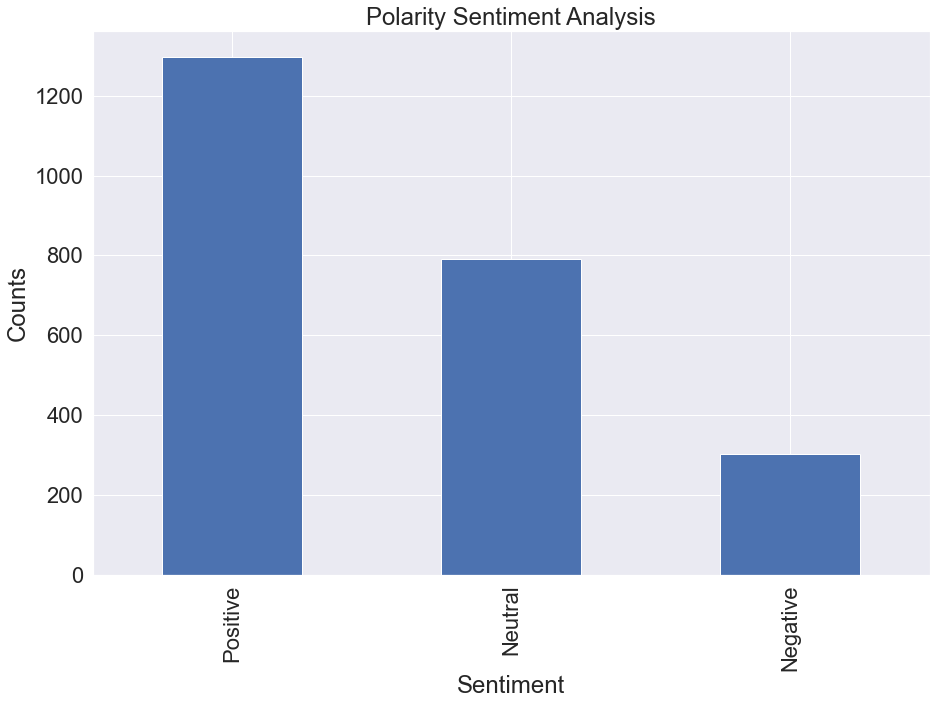

In [44]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

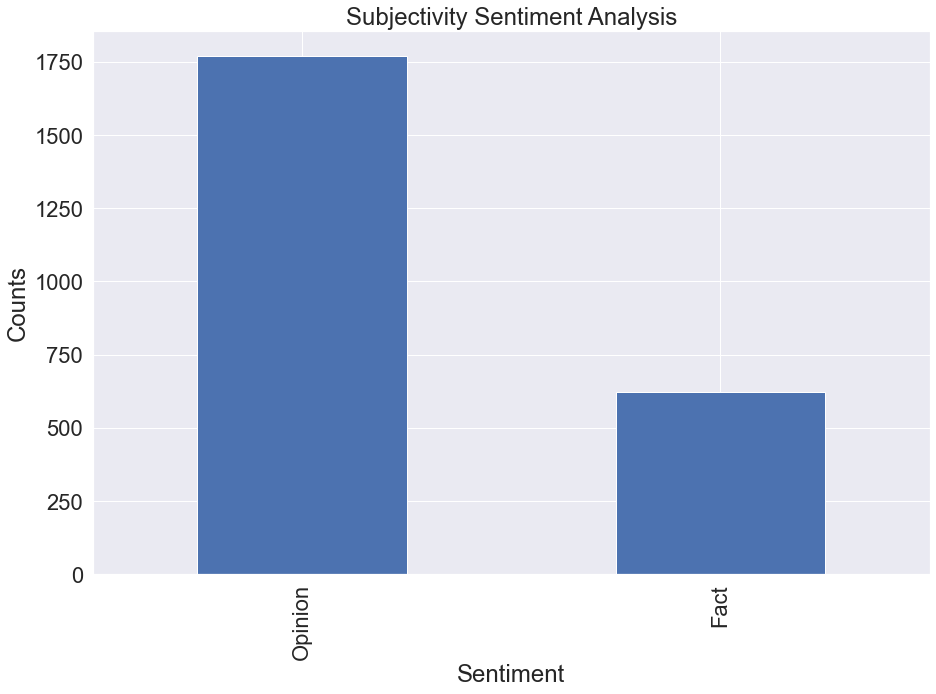

In [45]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

In [46]:
# Show the value counts
df['Analysis_Subjectivity'].value_counts()

Opinion    1768
Fact        622
Name: Analysis_Subjectivity, dtype: int64

# TOPIC MODELING

In [47]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [48]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df['cleaned_tweets'].values.astype('U'))
print(dtm_tf.shape)

(2390, 571)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [49]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_tweets'].values.astype('U'))
print(dtm_tfidf.shape)

(2390, 571)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning:

Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.



In [50]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tfidf.fit(dtm_tfidf)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LatentDirichletAllocation(n_components=8, random_state=50)

In [51]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 10 words for topic #0:
['book', 'severe', 'need', 'better', 'government', 'stroke', 'died', 'right', 'physician', 'live', 'really', 'got', 'vaccination', 'appointment', 'today', 'think', 'know', 'did', 'time', 'vaccines', 'vaccinated', 'people', 'like', 'world', 'patients', 'vaccine', 'don', 'telehealth', 'amp', 'covid']


Top 10 words for topic #1:
['address', 'available', 'mississippi', 'learn', 'service', 'potential', 'october', 'assess', 'week', 'physical', 'changed', 'regulations', 'million', 'addressing', 'ata', 'use', 'link', 'deaths', 'allow', 'total', 'technology', 'healthcare', 'covid', 'health', 'disparities', 'role', 'telehealth', 'cases', 'new', 'telemedicine']


Top 10 words for topic #2:
['share', 'minister', 'nurse', 'register', 'leaders', 'join', 'people', 'based', 'review', 'implementation', 'pandemic', 'time', 'self', 'getting', 'study', 'healthcare', 'team', 'annually', 'says', 'dollars', 'health', 'market', 'support', 'industry', 'billion', 'india', 'save', 'te

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.019397 -0.017688       1        1  14.322152
5     -0.056712 -0.032826       2        1  14.312258
7     -0.097811 -0.048849       3        1  13.842024
3      0.015842 -0.007634       4        1  13.165104
6      0.114475 -0.189664       5        1  11.751396
1      0.181719  0.001374       6        1  11.583667
0     -0.229960  0.038906       7        1  11.440371
2      0.091844  0.256381       8        1   9.583028, topic_info=             Term        Freq       Total Category  logprob  loglift
342       patient  113.000000  113.000000  Default  30.0000  30.0000
59           care  356.000000  356.000000  Default  29.0000  29.0000
498  telemedicine  619.000000  619.000000  Default  28.0000  28.0000
343      patients  169.000000  169.000000  Default  27.0000  27.0000
131       digital  112.000000  112.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
509          time   19.234158   80.331431   Topic8  -4.4081   0.9157
202    healthcare   20.326842  183.312401   Topic8  -4.3528   0.1459
344        people   18.344631  102.693325   Topic8  -4.4554   0.6228
201        health   22.200475  362.382144   Topic8  -4.2647  -0.4474
337      pandemic   18.990623  146.853396   Topic8  -4.4208   0.2997

[432 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1         3  0.982836  abortion
2         1  0.177180    access
2         2  0.295300    access
2         3  0.324830    access
2         4  0.073825    access
...     ...       ...       ...
563       4  0.689208   workers
565       7  0.981418     world
568       1  0.064895       yes
568       2  0.713847       yes
568       4  0.129790       yes

[905 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 8, 4, 7, 2, 1, 3])

In [53]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(2390, 8)

In [54]:
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,tweet,language,day,geo,Time,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,The Emergence &amp; Implications of Telemedicine &amp; Telehealth for the US Healthcare System,en,3,NaN,01:18:28,2021,10,the emergence amp implications of telemedicine amp telehealth for the us healthcare system,0.000000,0.000000,Neutral,Fact
1,1,There's still time to register for tomorrow's webinar on Digital Transformation in Healthcare. Find out more and register here -,en,3,NaN,01:23:10,2021,10,there s still time to register for tomorrow s webinar on digital transformation in healthcare find out more and register here,0.250000,0.250000,Positive,Opinion
2,2,"I saw mine once, via telemedicine, and since then we just text.",en,3,NaN,01:28:55,2021,10,i saw mine once via telemedicine and since then we just text,0.000000,0.000000,Neutral,Fact
3,3,"Such important work all three of you have ahead, especially as more of our country relies upon healthcare (including telemedicine) and other services that require connectivity to deliver. Last mile problem still exists across much of the US.",en,3,NaN,01:29:59,2021,10,such important work all three of you have ahead especially as more of our country relies upon healthcare including telemedicine and other services that require connectivity to deliver last mile problem still exists across much of the us,0.523611,0.245833,Positive,Opinion
4,4,"Here's what has to say about in , Educating people, including healthcare providers, and building awareness remains the top priority in via",en,3,NaN,01:39:29,2021,10,here s what has to say about in educating people including healthcare providers and building awareness remains the top priority in via,0.500000,0.500000,Positive,Opinion


In [55]:
df.columns

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Unnamed: 0', 'tweet', 'language', 'day', 'geo', 'Time', 'Year',
       'Month', 'cleaned_tweets', 'Subjectivity', 'Polarity',
       'Analysis_Polarity', 'Analysis_Subjectivity'],
      dtype='object')

In [56]:
#REPLACE THESE WORDS WITH YOUR IDENTIFIED TOPICS FROM THE TOPIC MODELING. 

df_1=df.replace({0:'Vaccine',1:'Misellaneous',2:'Leaders',3:'Telehealth Companies',4:'Telehealth Technology',5:'Physician',6:'Telehealth',7:'Primary Care Visits'})

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [57]:
df_1['Topic'] = topic_values.argmax(axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:
df['Topic'] = topic_values.argmax(axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
df_1.columns

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Unnamed: 0', 'tweet', 'language', 'day', 'geo', 'Time', 'Year',
       'Month', 'cleaned_tweets', 'Subjectivity', 'Polarity',
       'Analysis_Polarity', 'Analysis_Subjectivity', 'Topic'],
      dtype='object')

In [60]:
df2 = df_1.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

df2

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
0,58,114,167
1,20,118,145
2,30,74,89
3,48,123,156
4,40,100,193
5,40,92,214
6,20,89,145
7,47,80,188


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Negative  8 non-null      int64
 1   Neutral   8 non-null      int64
 2   Positive  8 non-null      int64
dtypes: int64(3)
memory usage: 256.0 bytes


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [62]:
df2['Total'] = df2.sum(axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [63]:
df2.columns

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [64]:
for i in df2:
    df2[i] = round(df2[i]*100/df2.Total)

df2

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,17.0,34.0,49.0,100.0
1,7.0,42.0,51.0,100.0
2,16.0,38.0,46.0,100.0
3,15.0,38.0,48.0,100.0
4,12.0,30.0,58.0,100.0
5,12.0,27.0,62.0,100.0
6,8.0,35.0,57.0,100.0
7,15.0,25.0,60.0,100.0


In [65]:
df2=df2.fillna(0)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [66]:
#Conduct Polarity Topic Analysis using Tableau

df.to_excel("Polarity_TopicModeling_211106.xlsx")

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [67]:
df2= df2.drop(['Total'], axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



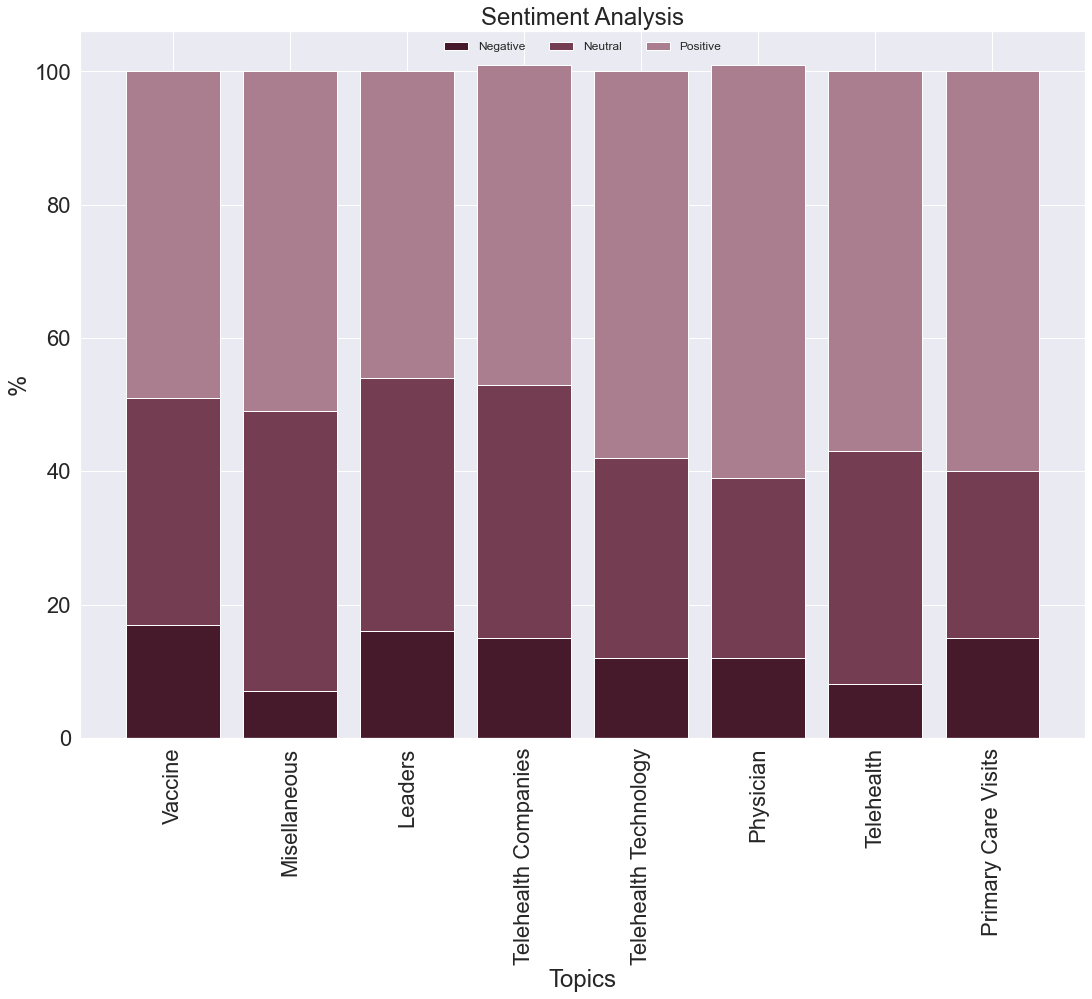

In [68]:
#Plotting and visualizing the counts
plt.figure(figsize=(18,13)) 



topic = ['Vaccine','Misellaneous','Leaders','Telehealth Companies','Telehealth Technology','Physician','Telehealth','Primary Care Visits']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,df2['Negative'], color='#471a2b')
p2=plt.bar(topic,df2['Neutral'], color='#753d52',  bottom=df2['Negative'])
p3=plt.bar(topic,df2['Positive'], color='#ab7e8f', bottom=df2['Neutral']+df2['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topics")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()
